In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"E:/Coding\DEmo Websites/RESUME- Screener/notebooks\data/UpdatedResumeDataSet.csv")


In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df["Category"].unique()

<StringArray>
[             'Data Science',                        'HR',
                  'Advocate',                      'Arts',
             'Web Designing',       'Mechanical Engineer',
                     'Sales',        'Health and fitness',
            'Civil Engineer',            'Java Developer',
          'Business Analyst',             'SAP Developer',
        'Automation Testing',    'Electrical Engineering',
        'Operations Manager',          'Python Developer',
           'DevOps Engineer', 'Network Security Engineer',
                       'PMO',                  'Database',
                    'Hadoop',             'ETL Developer',
          'DotNet Developer',                'Blockchain',
                   'Testing']
Length: 25, dtype: str

In [5]:
df["Category"].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
ETL Developer                40
Blockchain                   40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [6]:
df.index

RangeIndex(start=0, stop=962, step=1)

In [7]:
# 2. Basic Sanity Check
print("--- Data Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Category  962 non-null    str  
 1   Resume    962 non-null    str  
dtypes: str(2)
memory usage: 15.2 KB
None

--- Missing Values ---
Category    0
Resume      0
dtype: int64


In [8]:
# 3. Check the "Category" Distribution
print("\n--- Unique Categories ---")
print(f"Total Unique Categories: {df['Category'].nunique()}")
print(df['Category'].value_counts())


--- Unique Categories ---
Total Unique Categories: 25
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
ETL Developer                40
Blockchain                   40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


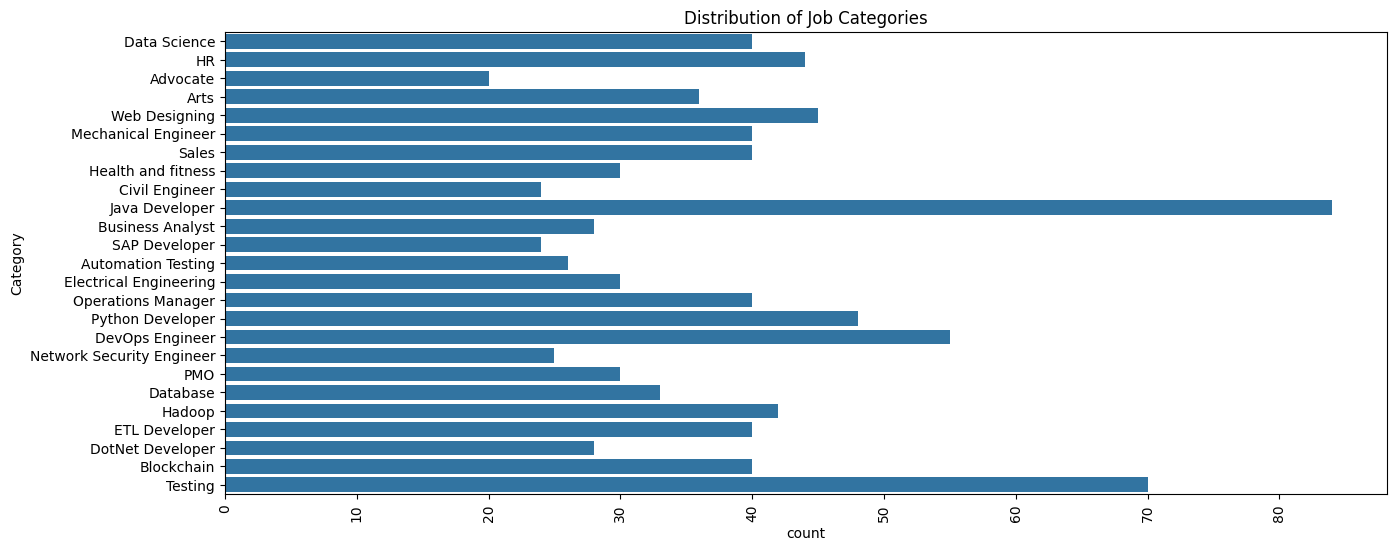

In [9]:
# 4. Visualizing the Imbalance
plt.figure(figsize=(15,6))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.title("Distribution of Job Categories")
plt.show()

In [10]:
# 5. Inspect the "Resume" Text Quality
# Let's look at the first full resume to see what garbage we need to clean
print("\n--- Raw Resume Text (Sample) ---")
print(df['Resume'][0])


--- Raw Resume Text (Sample) ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investiga

In [11]:
import re

def clean_resume(text):
    """
    Input: Raw resume string
    Output: Cleaned string (no URLs, hashtags, special chars, etc.)
    """
    # 1. Remove URLs (http://...)
    text = re.sub('http\S+\s*', ' ', text)
    
    # 2. Remove RT and cc (Retweets/Carbon Copy - common in scraped data)
    text = re.sub('RT|cc', ' ', text)
    
    # 3. Remove Hashtags (#MachineLearning)
    text = re.sub('#\S+', '', text)
    
    # 4. Remove Mentions (@HR_Manager)
    text = re.sub('@\S+', '  ', text)
    
    # 5. Remove Special Characters (Like the â€¢ and *)
    # This regex keeps only letters, numbers, and spaces.
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    
    # 6. Remove Non-ASCII characters (This kills the â€¢ and Ã¯ garbage)
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    
    # 7. Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    
    return text.lower() # Convert to lowercase so "Python" == "python"

# Apply this function to your DataFrame
df['cleaned_resume'] = df['Resume'].apply(lambda x: clean_resume(x))

# Let's check the difference
print("--- BEFORE ---")
print(df['Resume'][0][:150]) # First 150 chars
print("\n--- AFTER ---")
print(df['cleaned_resume'][0][:150])

--- BEFORE ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression,

--- AFTER ---
skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes 


<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:18: SyntaxWarning: invalid escape sequence '\S'
<>:22: SyntaxWarning: invalid escape sequence '\]'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:18: SyntaxWarning: invalid escape sequence '\S'
<>:22: SyntaxWarning: invalid escape sequence '\]'
<>:28: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DEBARNAB DAS\AppData\Local\Temp\ipykernel_5212\1227868314.py:9: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('http\S+\s*', ' ', text)
C:\Users\DEBARNAB DAS\AppData\Local\Temp\ipykernel_5212\1227868314.py:15: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('#\S+', '', text)
C:\Users\DEBARNAB DAS\AppData\Local\Temp\ipykernel_5212\1227868314.py:18: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('@\S+', '  ', text)
C:\Users\DEBARNAB DAS\AppDat

In [12]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [13]:
# Save the cleaned data to a new CSV
# index=False prevents pandas from adding an annoying generic index column (0, 1, 2...)
df.to_csv('data/cleaned_resume_data.csv', index=False)

print("Saved cleaned data to 'data/cleaned_resume_data.csv'")

Saved cleaned data to 'data/cleaned_resume_data.csv'


In [14]:
df['Category'].values

<StringArray>
['Data Science', 'Data Science', 'Data Science', 'Data Science',
 'Data Science', 'Data Science', 'Data Science', 'Data Science',
 'Data Science', 'Data Science',
 ...
      'Testing',      'Testing',      'Testing',      'Testing',
      'Testing',      'Testing',      'Testing',      'Testing',
      'Testing',      'Testing']
Length: 962, dtype: str

In [15]:
df['Resume'].values

<StringArray>
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         